# Description

It analyzes how consensus partitions generated before agree with the ensemble, and selects the best ones for downstream analyses.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_NULL_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(413, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,scc_025,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,0.030600,0.000169,0.069651,0.101382,0.000544,0.155524,0.105621,0.009857,0.153730
1,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.053822,-0.000019,0.114262,0.144432,0.000731,0.221952,0.149917,0.011109,0.219680
2,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,0.063607,0.000089,0.119619,0.165313,0.000997,0.250499,0.171683,0.013776,0.247910
3,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.084613,0.000429,0.150065,0.185441,0.001292,0.281006,0.192515,0.012765,0.278085
4,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0.096732,0.000172,0.169074,0.196785,0.001037,0.299126,0.204510,0.013259,0.295917


# Explore clustering indexes

In [8]:
_col = "ari_mean"

_best_parts_by_ari = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col, ascending=False).head(1))
    .sort_values(_col, ascending=False)[["method", "k", _col]]
    .rename(columns={_col: "index_value"})
)

In [9]:
_col = "ami_mean"

_best_parts_by_ami = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col, ascending=False).head(1))
    .sort_values(_col, ascending=False)[["method", "k", _col]]
    .rename(columns={_col: "index_value"})
)

In [10]:
_col = "nmi_mean"

_best_parts_by_nmi = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col, ascending=False).head(1))
    .sort_values(_col, ascending=False)[["method", "k", _col]]
    .rename(columns={_col: "index_value"})
)

In [11]:
_indexes_colors = sns.color_palette("colorblind", 3)
display(_indexes_colors)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)]

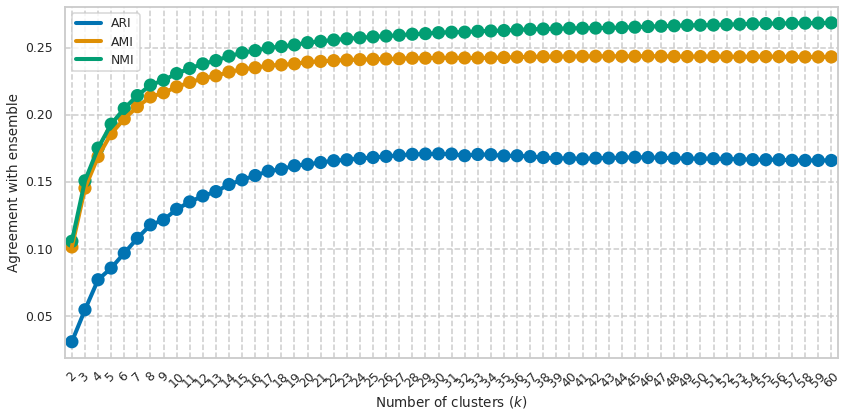

In [12]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.pointplot(
        data=_best_parts_by_ari,
        x="k",
        y="index_value",
        color=_indexes_colors[0],
        ci=None,
    )
    ax = sns.pointplot(
        data=_best_parts_by_ami,
        x="k",
        y="index_value",
        color=_indexes_colors[1],
        ci=None,
    )
    ax = sns.pointplot(
        data=_best_parts_by_nmi,
        x="k",
        y="index_value",
        color=_indexes_colors[2],
        ci=None,
    )

    ax.set_ylabel(f"Agreement with ensemble")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["ARI", "AMI", "NMI"])
    plt.grid(True)
    plt.tight_layout()

AMI and NMI show the same trend for higher `k`. That's surprising. I would have expected that AMI has the same pattern as ARI, since both are adjusted-for-chance, and should not show higher values for higher `k` as it is expected for a not adjusted-for-chance index as NMI.

**CONCLUSION:** I will pick ARI for the follow up analysis.

# Explore best partition per k

In [13]:
_selected_measure = "ARI"
_mean_column, _median_column = "ari_mean", "ari_median"

In [14]:
best_parts_by_mean = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_mean_column, ascending=False).head(1))
    .sort_values(_mean_column, ascending=False)[["method", "k", _mean_column]]
)
display(best_parts_by_mean.head(10))

,,method,k,ari_mean
k,,,,
30,323,scc_020,30,0.170817
29,86,scc_030,29,0.170662
31,324,scc_020,31,0.170648
28,85,scc_030,28,0.170449
33,267,scc_050,33,0.170355
34,327,scc_020,34,0.170212
27,261,scc_050,27,0.169714
32,89,scc_030,32,0.169448
36,270,scc_050,36,0.169407


In [15]:
best_parts_by_median = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_median_column, ascending=False).head(1))
    .sort_values(_median_column, ascending=False)[["method", "k", _median_column]]
)
display(best_parts_by_median.head(10))

,,method,k,ari_median
k,,,,
11,363,eac_complete_coassoc_matrix,11,0.015548
8,360,eac_complete_coassoc_matrix,8,0.015406
10,362,eac_complete_coassoc_matrix,10,0.015159
9,361,eac_complete_coassoc_matrix,9,0.015153
12,364,eac_complete_coassoc_matrix,12,0.007814
13,365,eac_complete_coassoc_matrix,13,0.007495
15,367,eac_complete_coassoc_matrix,15,0.007408
14,366,eac_complete_coassoc_matrix,14,0.007381
16,368,eac_complete_coassoc_matrix,16,0.004413


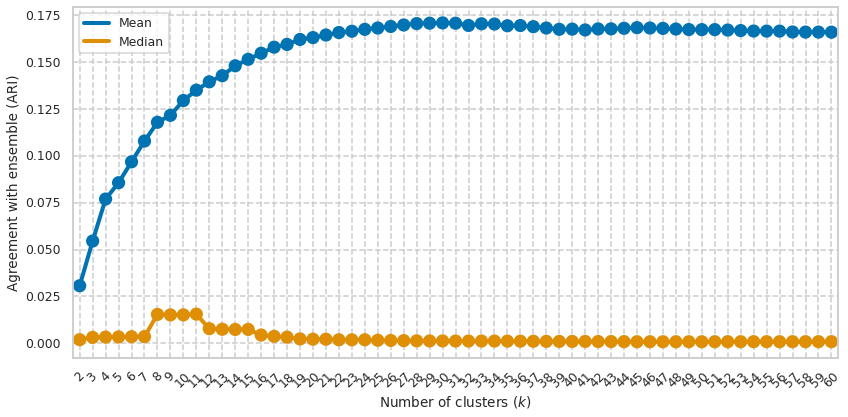

In [16]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.pointplot(
        data=best_parts_by_mean,
        x="k",
        y=_mean_column,
        ci=None,
        color=_indexes_colors[0],
        label="Mean",
    )
    ax = sns.pointplot(
        data=best_parts_by_median,
        x="k",
        y=_median_column,
        ci=None,
        color=_indexes_colors[1],
        label="Median",
        ax=ax,
    )
    ax.set_ylabel(f"Agreement with ensemble ({_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

Both central tendency measures (the mean and the median) have the same behevior: higher agreement on lower/medium k values, and lower agreement on higher k values.

# Which consensus method performs better?

For this comparison, I take the partitions with an agreement higher than the 75th percentile. From this set, I count how many times each method won.

## Using best by mean

In [17]:
_stats_data = best_parts_by_mean[_mean_column].describe()
display(_stats_data)

count    59.000000
mean      0.153364
std       0.030169
min       0.030675
25%       0.156260
50%       0.166726
75%       0.168085
max       0.170817
Name: ari_mean, dtype: float64

In [18]:
best_parts_by_mean[best_parts_by_mean[_mean_column] > _stats_data["75%"]][
    "method"
].value_counts()

scc_050                       5
scc_030                       4
scc_020                       3
eac_average_coassoc_matrix    2
scc_025                       1
Name: method, dtype: int64

SCC picked the "best partition" 14 times, whereas EAC (hierarhical clustering) did it only once.

## Using best by median

In [19]:
_stats_data = best_parts_by_median[_median_column].describe()
display(_stats_data)

count    59.000000
mean      0.002899
std       0.003805
min       0.000836
25%       0.000876
50%       0.001207
75%       0.003221
max       0.015548
Name: ari_median, dtype: float64

In [20]:
best_parts_by_median[best_parts_by_median[_median_column] > _stats_data["75%"]][
    "method"
].value_counts()

eac_complete_coassoc_matrix    15
Name: method, dtype: int64

If we use the "best partitions by median", EAC (HC) picked the best one 5 times, whereas SCC did it 10 times.

**CONCLUSION:** we select SCC as the method for follow up analysis.

# Select best partition per k

In [21]:
_selected_stat = "Median"
_measure_col = _median_column

In [22]:
best_parts = (
    consensus_clustering_results[
        consensus_clustering_results["method"].str.startswith("scc_")
    ]
    .groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [23]:
best_parts = best_parts.set_index("k")

In [24]:
best_parts.shape

(59, 3)

In [25]:
# show partitions with top values
best_parts.head(10)

,method,partition,ari_median
k,,,
7,scc_020,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.000719
14,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000644
5,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000601
36,scc_050,"[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000589
33,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000578
16,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000567
8,scc_020,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.000563
15,scc_020,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.000562
39,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000543


In [26]:
best_parts.sort_values("k")

,method,partition,ari_median
k,,,
2,scc_025,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.691719e-04
3,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-3.045898e-07
4,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.828000e-04
5,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.014411e-04
6,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.801649e-04
7,scc_020,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",7.193555e-04
8,scc_020,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",5.625538e-04
9,scc_020,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",4.875472e-04
10,scc_020,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",3.993470e-04


## Select partitions with highest agreement

We do not expect all partitions with different `k` to be good ones. Thus, here I select the partitions with an ensemble agreement that pass a relative high threshold (75th percentile).

In [27]:
best_parts_stats = best_parts[_measure_col].describe()
display(best_parts_stats)

count    5.900000e+01
mean     4.661551e-04
std      1.042585e-04
min     -3.045898e-07
25%      4.324421e-04
50%      4.828000e-04
75%      5.101938e-04
max      7.193555e-04
Name: ari_median, dtype: float64

In [28]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

best_parts = best_parts.assign(
    selected=best_parts[_measure_col].apply(lambda x: x >= best_threshold)
)

0.0005101937973594319

In [29]:
best_parts.shape

(59, 4)

In [30]:
best_parts.head()

,method,partition,ari_median,selected
k,,,,
7,scc_020,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.000719,True
14,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000644,True
5,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000601,True
36,scc_050,"[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000589,True
33,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000578,True


## Save best partitions per k

In [31]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering/best_partitions_by_k.pkl')

In [32]:
best_parts.to_pickle(output_file)

# Plot of selected best partitions

In [33]:
plot_data = best_parts.reset_index()
display(plot_data.head(5))

,k,method,partition,ari_median,selected
0,7,scc_020,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.000719,True
1,14,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000644,True
2,5,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000601,True
3,36,scc_050,"[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000589,True
4,33,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000578,True


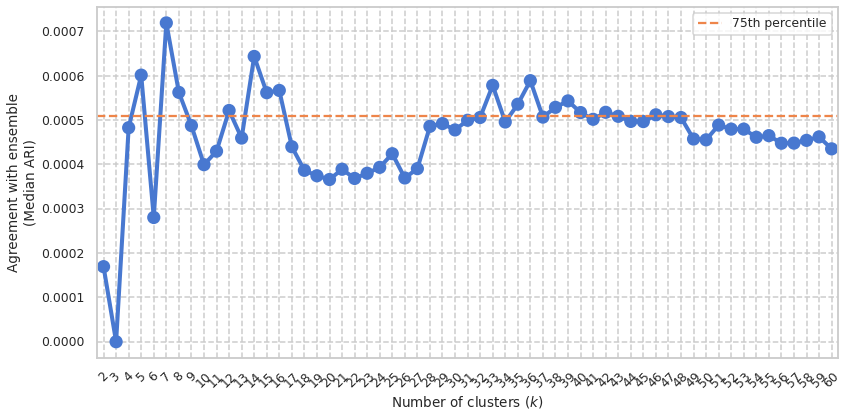

In [34]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel(f"Agreement with ensemble\n({_selected_stat} {_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

The horizontal line in the plot is the median of the average agreement value; partitions above that line are marked as selected for downstream analysis

In [35]:
# this list shows the selected final partitions, and which methods achieved the highest agreement
plot_data[plot_data["selected"]].sort_values("k")

,k,method,partition,ari_median,selected
2,5,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000601,True
0,7,scc_020,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.000719,True
6,8,scc_020,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.000563,True
11,12,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000522,True
1,14,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000644,True
7,15,scc_020,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.000562,True
5,16,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000567,True
4,33,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000578,True
9,35,scc_050,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...",0.000536,True
3,36,scc_050,"[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000589,True


From the two evidence accumulation approaches (EAC) we are using, the spectral clustering based one does it better for almost all `k` values, whereas the hierarchical clustering based approach seems to do a little bit better for lower `k`.